**Latihan Membuat Model Klasifikasi Gambar**

In [1]:
import os
import numpy as np
import shutil

rootdir= '/content/drive/MyDrive/Machine Learning Dicoding/data/rockpaperscissors' #path of the original folder

classes = ['paper', 'rock','scissors']

for i in classes:
  os.makedirs(rootdir +'/train/' + i)
  os.makedirs(rootdir +'/val/' + i)
  source = rootdir + '/' + i

  allFileNames = os.listdir(source)
  np.random.shuffle(allFileNames)

  val_ratio = 0.40
  train_FileNames, val_FileNames = np.split(np.array(allFileNames),
                                                        [int(len(allFileNames)* (1 - val_ratio))])

  train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
  val_FileNames = [source+'/' + name for name in val_FileNames.tolist()]

  for name in train_FileNames:
    shutil.copy(name, rootdir +'/train/' + i)

  for name in val_FileNames:
    shutil.copy(name, rootdir +'/val/' + i)

In [5]:
base_dir = '/content/drive/MyDrive/Machine Learning Dicoding/data/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

os.listdir('/content/drive/MyDrive/Machine Learning Dicoding/data/rockpaperscissors/val')

['paper', 'rock', 'scissors']

membuat direktori

In [41]:
import os

# membuat direktori paper pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')
 
# membuat direktori rock pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')

# membuat direktori scissors pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')
 
# membuat direktori paper pada direktori data validasi
validation_paper_dir = os.path.join(val_dir, 'paper')

# membuat direktori rock pada direktori data validasi
validation_rock_dir = os.path.join(val_dir, 'rock')

# membuat direktori scissors pada direktori data validasi
validation_scissors_dir = os.path.join(val_dir, 'scissors')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=False,
                    shear_range = 0.3,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=False,
                    shear_range = 0.3,
                    fill_mode = 'nearest')

mempersiapkan data latih yang akan dipelajari oleh model.

In [42]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(20, 40),  # mengubah resolusi seluruh gambar 
        batch_size=5,
        class_mode='sparse')
 
val_generator = test_datagen.flow_from_directory(
        val_dir, # direktori data validasi
        target_size=(20, 40), # mengubah resolusi seluruh gambar 
        batch_size=5, 
        class_mode='sparse')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [43]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(20, 40, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

menentukan loss function serta optimizer. Setelah itu kita dapat melatih model kita menggunakan metode fit.

In [44]:
from tensorflow.keras.optimizers import RMSprop

# compile model dengan RMSprop algorithm 'sparse_categorical_crossentropy' 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

# model.fit 
model.fit(
      train_generator,
      steps_per_epoch=20,  # jumlah batch yang akan dieksekusi pada setiap epoch
      epochs=20, # jumlah eposchs
      validation_data=val_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # jumlah batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
20/20 - 2s - loss: 1.0301 - accuracy: 0.5300 - val_loss: 0.9115 - val_accuracy: 0.6000
Epoch 2/20
20/20 - 1s - loss: 0.6513 - accuracy: 0.7100 - val_loss: 1.7193 - val_accuracy: 0.5200
Epoch 3/20
20/20 - 1s - loss: 0.6964 - accuracy: 0.7100 - val_loss: 0.5138 - val_accuracy: 0.8400
Epoch 4/20
20/20 - 1s - loss: 0.4865 - accuracy: 0.7900 - val_loss: 0.1884 - val_accuracy: 0.9600
Epoch 5/20
20/20 - 1s - loss: 0.3861 - accuracy: 0.8400 - val_loss: 0.2213 - val_accuracy: 0.9600
Epoch 6/20
20/20 - 1s - loss: 0.5781 - accuracy: 0.8200 - val_loss: 0.2642 - val_accuracy: 0.9600
Epoch 7/20
20/20 - 1s - loss: 0.4288 - accuracy: 0.8300 - val_loss: 0.6756 - val_accuracy: 0.7200
Epoch 8/20
20/20 - 1s - loss: 0.3931 - accuracy: 0.8454 - val_loss: 0.1375 - val_accuracy: 1.0000
Epoch 9/20
20/20 - 1s - loss: 0.3307 - accuracy: 0.8900 - val_loss: 0.1880 - val_accuracy: 0.9600
Epoch 10/20
20/20 - 1s - loss: 0.1952 - accuracy: 0.9500 - val_loss: 0.2969 - val_accuracy: 0.8800
Epoch 11/20
20/20 -

In [45]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 18, 38, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 9, 19, 32)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 17, 64)         18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               786944    
_________________________________________________________________
dense_15 (Dense)             (None, 3)                

In [46]:
val_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

hasil dari model yang telah dibuat

Saving 3bkC6JAPog7xX9WO.png to 3bkC6JAPog7xX9WO (1).png
3bkC6JAPog7xX9WO.png
Scissors


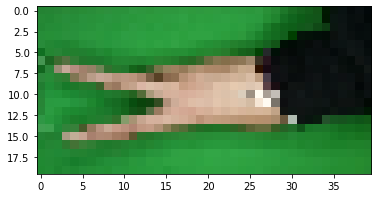

In [47]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(20,40))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if np.argmax(classes) == 0 :
    print("Paper")
  elif np.argmax(classes) == 1 :
    print("Rock")
  elif np.argmax(classes) == 2 :
    print("Scissors")
  else : 
    print("Unidentified")  